[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/projects/project-notebooks/Ocean_acidification_2024.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/projects/project-notebooks/Ocean_acidification_2024.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Ocean Acidification


**Content creators:** C. Gabriela Mayorga Adame, Lidia Krinova

**Content reviewers:** Will Gregory, Paul Heubel, Laura Paccini, Jenna Pearson, Ohad Zivan

**Content editors:** Paul Heubel

**Production editors:** Paul Heubel, Konstantine Tsafatinos

**Our 2024 Sponsors:** CMIP, NFDI4Earth

In [2]:
# @title Project Background

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents


video_ids = [('Youtube', 'NAgrB8HxMMk'), ('Bilibili', 'BV1fM4y1x7g8')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [3]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "n7wdy"
# or "hbx8d"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/n7wdy/


Human activities release CO2 into the atmosphere, which leads to atmospheric warming and climate change. A portion of this CO2 released by human activities is absorbed into the oceans, which has a direct, chemical effect on seawater, known as ocean acidification. When CO2 combines with water in the ocean it forms carbonic acid, which makes the ocean more acidic and can have negative impacts on certain marine ecosystems (e.g., reduce the ability of calcifying organisms to form their shells and skeletons). The degree of ocean acidification is often expressed in terms of the pH of seawater, which is the measure of acidity or alkalinity such that a pH below 7 is considered acidic, and a pH greater than 7 is considered alkaline, or basic. Additional background information on ocean acidification can be found [here](https://coastadapt.com.au/ocean-acidification-and-its-effects). In this project, you will explore spatial and temporal patterns of and relationships between pH, CO2, and temperature to assess changes in ocean acidification and the impact on marine ecosystems.

**In this project**, you will analyse ocean model and observational data from global databases to extract variables like pH, CO<sub>2</sub>, and temperature, and to investigate ocean acidification process in your region of interest. This project will also be an opportunity to investigate the relationships between these variables as well as their impact on the marine ecosystems.

# Project Template

<img src='../template-images/2024_OceanAcidification.svg'/>

*Note: The dashed boxes are socio-economic questions.*

# Data Exploration Notebook
## Project Setup


In [4]:
# google colab installs

# !mamba install

In [5]:
# imports

import random
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pooch
import pandas as pd
import os
import tempfile
from requests.exceptions import ReadTimeout

In [6]:
# helper functions

def pooch_load(filelocation=None,filename=None,processor=None):
    shared_location='/home/jovyan/shared/Data/Projects/Ocean_Acidification' # this is different for each day
    user_temp_cache=tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location,filename)):
        file = os.path.join(shared_location,filename)
    else:
        file = pooch.retrieve(filelocation,known_hash=None,fname=os.path.join(user_temp_cache,filename),processor=processor)

    return file

## NOAA Ocean pH and Acidity

### Global surface ocean acidification indicators from 1750 to 2100 (NCEI Accession 0259391)

This data package contains a hybrid surface ocean acidification (OA) data product that is produced based on three recent observational data products:
- Surface Ocean CO2 Atlas (SOCAT, version 2022)
- Global Ocean Data Analysis Product version 2 (GLODAPv2, version 2022)
- Coastal Ocean Data Analysis Product in North America (CODAP-NA, version 2021), and 14 Earth System Models from the sixth phase of the Coupled Model Intercomparison Project ([CMIP6](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/CMIP/CMIP_resource_bank.md)).

The trajectories of ten OA indicators are included in this data product:
- Fugacity of carbon dioxide
- pH on Total Scale
- Total hydrogen ion content
- Free hydrogen ion content
- Carbonate ion content
- Aragonite saturation state
- Calcite saturation state
- Revelle Factor
- Total dissolved inorganic carbon content
- Total alkalinity content

These OA trajectories are provided under preindustrial conditions, historical conditions, and future Shared Socioeconomic Pathways: SSP1-1.9, SSP1-2.6, SSP2-4.5, SSP3-7.0, and SSP5-8.5 from 1750 to 2100 on a global surface ocean grid. These OA trajectories are improved relative to previous OA data products with respect to data quantity, spatial and temporal coverage, diversity of the underlying data and model simulations, and the provided SSPs over the 21st century.

**Citation:**
Jiang, L.-Q., Dunne, J., Carter, B. R., Tjiputra, J. F., Terhaar, J., Sharp, J. D., et al. (2023). Global surface ocean acidification indicators from 1750 to 2100. Journal of Advances in Modeling Earth Systems, 15, e2022MS003563. https://doi.org/10.1029/2022MS003563

**Dataset**: https://www.ncei.noaa.gov/data/oceans/ncei/ocads/metadata/0259391.html


We can load and visualize the **surface pH** as follows:

In [7]:
# code to retrieve and load the data
# url_SurfacepH= 'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0206289/Surface_pH_1770_2100/Surface_pH_1770_2000.nc' $ old CMIP5 dataset
filename_SurfacepH = 'pHT_median_historical.nc'
url_ncei = 'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0259391/nc/median/'
url_SurfacepH = f'{url_ncei}{filename_SurfacepH}'

try:
    print(f'Downloading from {url_ncei}...')
    ds_pH = xr.open_dataset(pooch_load(url_SurfacepH,filename_SurfacepH))
except ReadTimeout:
    print(f'Downloading from OSF because of a ReadTimeoutError. Please visit {url_ncei} for more datasets.')
    link_id = "ac7zg"
    download_link = f"https://osf.io/download/{link_id}/"
    ds_pH = xr.open_dataset(pooch_load(download_link,filename_SurfacepH))

ds_pH

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 18, lat: 180, lon: 360)
Coordinates:
  * time       (time) float64 144B 1.75e+03 1.85e+03 1.86e+03 ... 2e+03 2.01e+03
Dimensions without coordinates: lat, lon
Data variables:
    pHT        (time, lat, lon) float64 9MB ...
    longitude  (lat, lon) float64 518kB ...
    latitude   (lat, lon) float64 518kB ...
Attributes:
    title:               Global surface ocean pH on total hydrogen ion scale ...
    comment:             This gridded data product contains pH on total hydro...
    reference:           Jiang, L-Q., J. Dunne, B. R. Carter, J. Tjiputra,\n ...
    Fair_use_statement:  This data product is made freely available\n   to th...
    created_by:          Li-Qing Jiang
    institution:         (a) Cooperative Institute for Satellite Earth System...
    contact:             <Liqing.Jiang@noaa.gov>
    creation_date:       August 14, 2022

## Q1: Plotting pH over the Globe

We use the `sel()` method to select a subset of the data. This dataset has coordinates of time and space, and we can use `.sel()` to select smaller sections of space or specific times. We can plot directly with the `.plot()` method, or we can plot using matplotlib.

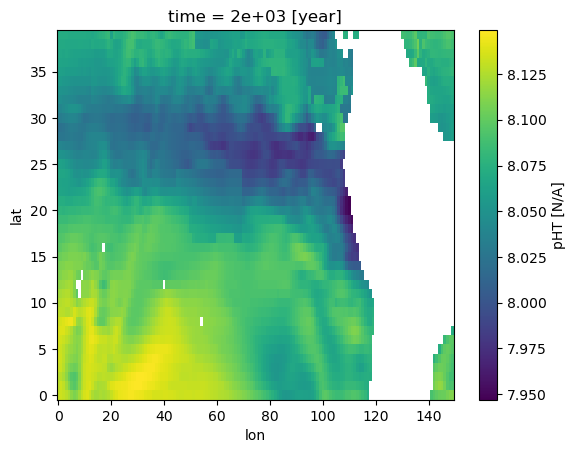

In [8]:
ds_pH['pHT'].sel(time='2000').sel(lat=slice(60,100),lon=slice(150,300)).plot()

To set up a more robust figure, we can use matplotlib. Here, we intialize a figure with 1 row and 3 columns. We extract the data we want to plot for each panel, and plot them using the `pcolormesh()` method on the axis object. Here, `axs` is a list of axes and we make sure to tell Python which axis we want to plot to using indicies (`ax[0]`, `ax[1]`, etc...). We can add other features, like titles, to individual axes. We can also add colorbars, and set the min and max values of each plot to be the same.

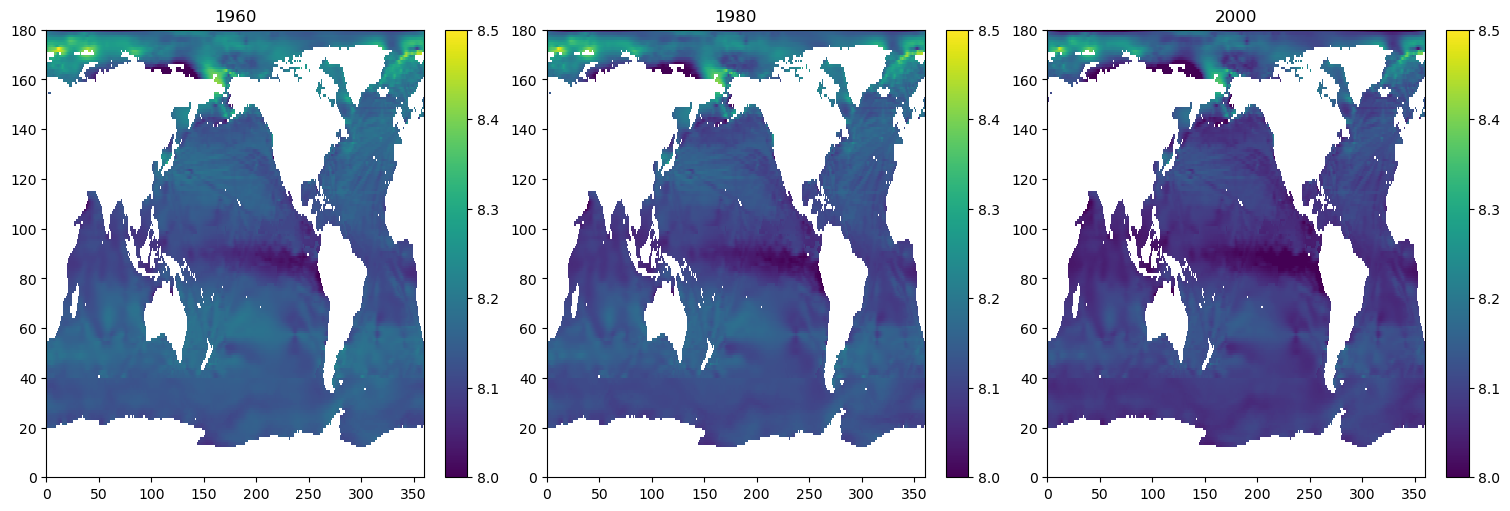

In [9]:
# Set up the figure to have 1 row and 3 columns.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# 1960
# 3 steps:
# 1) extract the data of interest
# 2) plot the data using pcolormesh()
# 3) add a colorbar for this specific plot
# 4) plot a title so that we know which panel is which year
pH_1960 = ds_pH['pHT'].sel(time='1960')
pcm_1960 = axs[0].pcolormesh(pH_1960, 
                             cmap='viridis',
                             vmin=8, vmax=8.5)
cb_1960 = fig.colorbar(pcm_1960, 
                       ax=axs[0], 
                       orientation='vertical')
axs[0].set_title('1960')

# 1980
pH_1980 = ds_pH['pHT'].sel(time='1980')
pcm_1980 = axs[1].pcolormesh(pH_1980, 
                             cmap='viridis',
                             vmin=8, vmax=8.5)
cb_1980 = fig.colorbar(pcm_1980, 
                       ax=axs[1], 
                       orientation='vertical')
axs[1].set_title('1980')

# 2000
pH_2000 = ds_pH['pHT'].sel(time='2000')
pcm_2000 = axs[2].pcolormesh(pH_2000, 
                             cmap='viridis',
                             vmin=8, vmax=8.5)
cb_2000 = fig.colorbar(pcm_2000, 
                       ax=axs[2], 
                       orientation='vertical')
axs[2].set_title('2000')

plt.show()

## Q2: Plotting a Time Series of Global Aveerages of pH

We have globally gridded data for each year, and we now want to make a time series of data. To do so, we take the mean (using the `.mean()` method) over the dimensions of interest.

In [10]:
unknown_value = ds_pH['pHT'].mean().values
print(unknown_value)

8.153600476850482


When we use the `mean()` method without specifying which dimensions we want to take the mean over, `xarray` simply takes the mean across all dimensions, collapsing all the data into 1 value.

In [11]:
averages = ds_pH['pHT'].mean(dim=['lat','lon'])

To plot the time series, we can use the `.plot()` function. We can "beautify" this plot with some extra steps (add labels, a title, a legend, etc...).

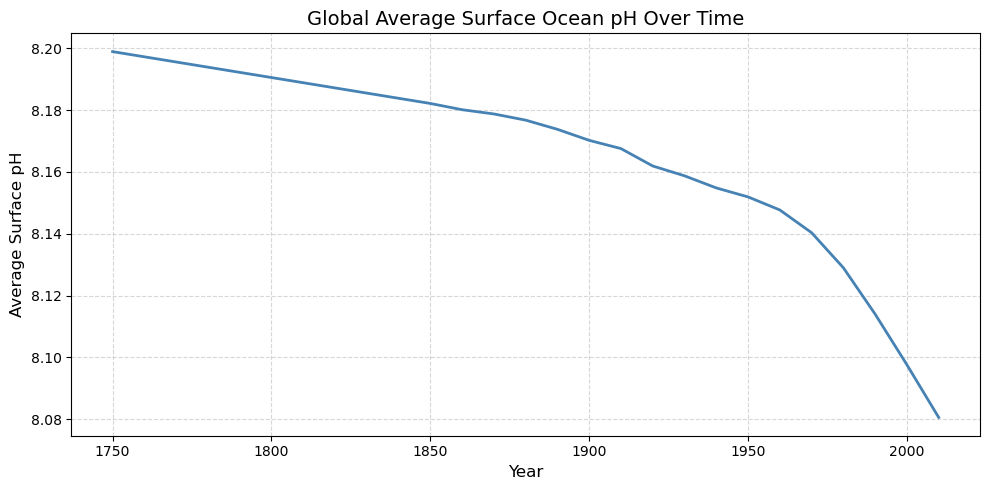

In [12]:
# This package helps us format the dates
import matplotlib.dates as mdates

# This time, we set up a 1-panel figure
fig, ax = plt.subplots(figsize=(10, 5))

# This creates a line plot with some additional stylying
ax.plot(ds_pH['time'], averages, 
        color='steelblue', linewidth=2, 
        label='Mean Surface pH')

# Here, we set axis labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Surface pH', fontsize=12)

# Add an imformative title
ax.set_title('Global Average Surface Ocean pH Over Time', fontsize=14)

# Optional: format x-axis if time is datetime-like
if np.issubdtype(ds_pH['time'].dtype, np.datetime64):
    ax.xaxis.set_major_locator(mdates.YearLocator(20))  # Put labels every 20 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    fig.autofmt_xdate()  # auto-rotate dates

# Add gridlines for interpretability
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend (turned off because the title tells us what we're looking at)
# ax.legend()

# Tight layout for spacing
plt.tight_layout()

plt.show()

## Q3: Regional pH

For this question, we're doing pretty much the same thing as we did for Q2, but for a region of interest. So first, we should select a region and plot, say, a map from 1 example year. I'll choose the region around the ENSO 3.4 index region, off the coast of Peru and Ecuador.

In [19]:
ds_pH_ENSO = ds_pH.sel(lon=slice(200, 275), lat=slice(70, 90))
ds_pH_ENSO

<xarray.Dataset> Size: 240kB
Dimensions:    (time: 18, lat: 20, lon: 75)
Coordinates:
  * time       (time) float64 144B 1.75e+03 1.85e+03 1.86e+03 ... 2e+03 2.01e+03
Dimensions without coordinates: lat, lon
Data variables:
    pHT        (time, lat, lon) float64 216kB 8.204 8.202 8.2 ... nan nan nan
    longitude  (lat, lon) float64 12kB ...
    latitude   (lat, lon) float64 12kB ...
Attributes:
    title:               Global surface ocean pH on total hydrogen ion scale ...
    comment:             This gridded data product contains pH on total hydro...
    reference:           Jiang, L-Q., J. Dunne, B. R. Carter, J. Tjiputra,\n ...
    Fair_use_statement:  This data product is made freely available\n   to th...
    created_by:          Li-Qing Jiang
    institution:         (a) Cooperative Institute for Satellite Earth System...
    contact:             <Liqing.Jiang@noaa.gov>
    creation_date:       August 14, 2022

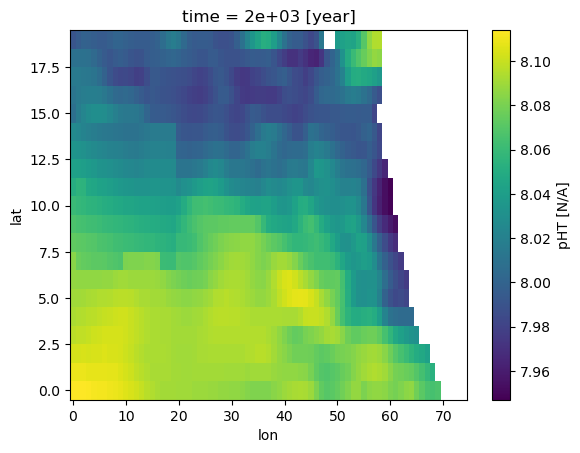

In [24]:
ds_pH_ENSO['pHT'].sel(time=2000).plot()

Now, similar to before, we will take a mean across space.

In [29]:
averages_ENSO = ds_pH_ENSO['pHT'].mean(dim=['lat','lon'])

As suggested by the prompt, we can plot the mean pH of our region versus the gloval mean to see how they compare. We will do so by simply adding to the plotting code that we used earlier.

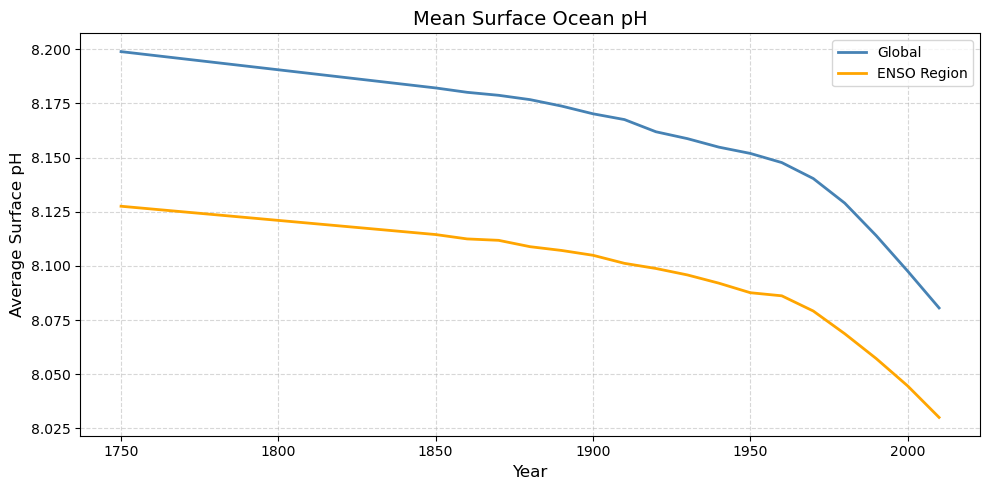

In [31]:
# This time, we set up a 1-panel figure
fig, ax = plt.subplots(figsize=(10, 5))

# This creates a line plot with some additional stylying
ax.plot(ds_pH['time'], averages, 
        color='steelblue', linewidth=2, 
        label='Global')

# Now, plot the averages for our region
ax.plot(ds_pH['time'], averages_ENSO, 
        color='orange', linewidth=2, 
        label='ENSO Region')

# Here, we set axis labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Surface pH', fontsize=12)

# Add an imformative title
ax.set_title('Mean Surface Ocean pH', fontsize=14)

# Optional: format x-axis if time is datetime-like
if np.issubdtype(ds_pH['time'].dtype, np.datetime64):
    ax.xaxis.set_major_locator(mdates.YearLocator(20))  # Put labels every 20 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    fig.autofmt_xdate()  # auto-rotate dates

# Add gridlines for interpretability
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend (here, we turn it on because we have 2 lines)
ax.legend()

# Tight layout for spacing
plt.tight_layout()

plt.show()

For those feeling adventurous, there are [also files](https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0259391/nc/median/) of future projected changes under various scenarios (SSP1-1.9, SSP1-2.6, SSP2-4.5, SSP3-7.0, and SSP5-8.5, recall W2D1 tutorials):
*   pHT_median_ssp119.nc
*   pHT_median_ssp126.nc
*   pHT_median_ssp245.nc
*   pHT_median_ssp370.nc
*   pHT_median_ssp585.nc

To load them, replace the filename in the path/filename line above. These data were calculated from CMIP6 models. To learn more about CMIP please see our [CMIP Resource Bank](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/CMIP/CMIP_resource_bank.md) and the [CMIP website](https://wcrp-cmip.org/).  

For the advanced questions in red you can use **sea surface temperature** and **CO<sub>2</sub> concentration** from [NOAA Global Monitoring Laboratory](https://gml.noaa.gov/ccgg/trends/gl_data.html)) which were previously introduced in the tutorials.
We can load and visualize this variables as follows:

In [13]:
filename_CO2= 'co2_mm_gl.csv'
url_CO2= 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv'
ds_CO2 = pd.read_csv(pooch_load(url_CO2,filename_CO2),header=55)

ds_CO2

,1980,5,1980.375,340.44,0.09,338.89,0.08
0,1980,6,1980.458,339.99,0.09,339.22,0.07
1,1980,7,1980.542,338.44,0.16,339.28,0.07
2,1980,8,1980.625,337.21,0.18,339.50,0.06
3,1980,9,1980.708,337.05,0.12,339.44,0.06
4,1980,10,1980.792,337.82,0.08,339.17,0.07
...,...,...,...,...,...,...,...
533,2024,11,2024.875,424.08,0.10,424.20,0.06
534,2024,12,2024.958,425.22,0.10,424.52,0.06
535,2025,1,2025.042,426.00,0.10,424.85,0.06
536,2025,2,2025.125,426.22,0.10,424.81,0.06


In [14]:
# from W1D3 tutorial 6 we have Sea Surface Temprature from 1981 to the present:
# download the monthly sea surface temperature data from NOAA Physical System
# Laboratory. The data is processed using the OISST SST Climate Data Records
# from the NOAA CDR program.
# the data downloading may take 2-3 minutes to complete.

filename_sst='sst.mon.mean.nc'
url_sst = "https://osf.io/6pgc2/download/"

ds_SST = xr.open_dataset(pooch_load(url_sst,filename_sst))
ds_SST

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 499, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

**Hints for socio-economic question (dashed boxes):**

Use the attached image (Figure 4 in [Kroaker et al., 2013]( https://doi.org/10.1111/gcb.12179) research paper) and this [mapping tool](https://mapper.obis.org/). Search for species of interest on the mapping tool to see their spatial global distribution and changes over time. Be critical about what you see.


![effects of ocean acidification](https://onlinelibrary.wiley.com/cms/asset/e3670b99-729f-42e6-9f5a-b2a67d5702ca/gcb12179-fig-0004-m.png)

Summary of effects of acidification among key taxonomic groups. Effects are represented as either mean percent (+) increase or percent (−) decrease in a given response.

# Further Reading

- Understanding Ocean Acidification", NOAA (https://www.fisheries.noaa.gov/insight/understanding-ocean-acidification)
- "Ocean acidification and its effects", CoastAdapt (https://coastadapt.com.au/ocean-acidification-and-its-effects)
- "Scientists Pinpoint How Ocean Acidification Weakens Coral Skeletons", WHOI (https://www.whoi.edu/press-room/news-release/scientists-identify-how-ocean-acidification-weakens-coral-skeletons/)
- "Ocean acidification and reefs", Smithonian Tropical Research Institute (https://stri.si.edu/story/ocean-acidification-and-reefs)
- Ocean Acidification | Learn Science at Scitable https://www.nature.com/scitable/knowledge/library/ocean-acidification-25822734/
- Henry, J., J. Patterson, and L. Krimsky. 2020. “Ocean Acidification: Calcifying Marine Organisms: FA220, 3/2020”. EDIS 2020 (2):4. https://doi.org/10.32473/edis-fa220-2020.
- Lauderdale, J. M., S. Dutkiewicz, R. G. Williams, and M. J. Follows (2016), Quantifying the drivers of ocean-atmosphere CO2 fluxes, Global Biogeochem. Cycles, 30  https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GB005400
- Increasingly Acidic Oceans Are Causing Fish to Behave Badly | Scientific American https://www.scientificamerican.com/article/increasingly-acidic-oceans-are-causing-fish-to-behave-badly/



# Other Resources

This tutorial uses data from the simulations conducted as part of the [CMIP6](https://wcrp-cmip.org/) multi-model ensemble.

For examples on how to access and analyze data, please visit the [Pangeo Cloud CMIP6 Gallery](https://gallery.pangeo.io/repos/pangeo-gallery/cmip6/index.html)

For more information on what CMIP is and how to access the data, please see this [page](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/CMIP/CMIP_resource_bank.md).